# Notebook 14: Introduction to Confidence Intervals
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Sampling Confidence Intervals 
*** 

In this exercise we'll get some experience implementing confidence intervals for samples of a population.  Suppose that we wish to sample household incomes from a population in units of hundreds-of-thousands of dollars.  In general it is not necessary that we know the distribution that the quantity of interest follows, but in this case we'll assume that household income follows a Weibull distribution. 

We can draw samples from this population and plot the histogram as follows: 

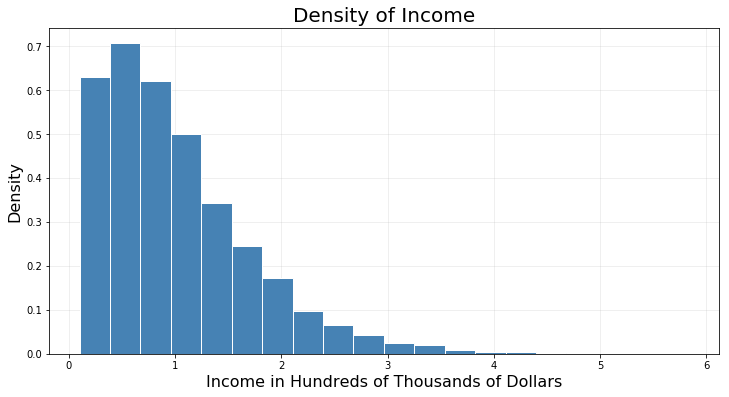

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=10000)
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("Income in Hundreds of Thousands of Dollars", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
ax.set_title("Density of Income", fontsize=20);

**Part A**: Complete the following function that draws 20 independent samples of size $n$ from the population and plots confidence intervals for each sample against the mean.  Because we know the distribution from sampling from, we can use the exact mean and variance in the determination of the confidence intervals.   

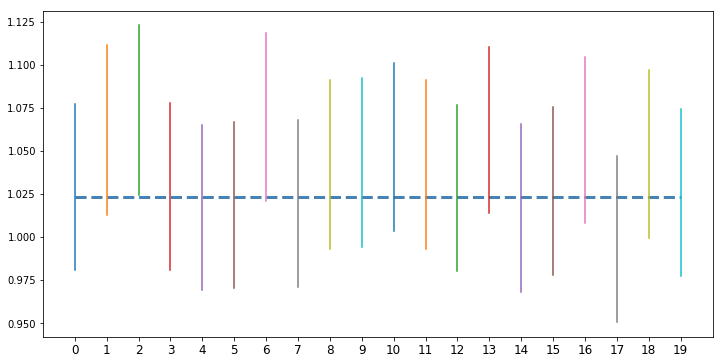

In [18]:
def income_CI(n=100, alpha=.05):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # Get the true mean and variance of the distribution 
    mean, var = stats.weibull_min.stats(loc=0.1, c=1.3, moments='mv')
    
    ax.plot([0,19], [mean, mean], color="steelblue", ls='--', lw=3)
    alpha= .05
    # Draw 20 independent samples of size n 
    for sId in range(20):
        # Draw samples from Weibull distribution 
        x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=n)
        xbar = np.sum(x)/len(x)
        z = stats.norm.ppf(1-alpha/2)
        varx = np.std(x, ddof = 1)
        CImin = xbar-z*np.sqrt(var)/np.sqrt(len(x)) # TODO 
        CImax = xbar+z*np.sqrt(varx)/np.sqrt(len(x))
        ax.plot([sId, sId], [CImin, CImax])
        
    ax.set_xlim([-1,20])
    plt.xticks(range(20), fontsize=12)
        
income_CI(n=1000)

**Part B**: Run your simulation above multiple times.  About how many of the 20 CIs would you expect to not cover the mean?  Do your experiments above bear this out?   